Cho mảng A có kích thước n. Giả sử, giá trị A[i] cho biết độ dài của tệp thứ i và người ta cần ghép (merge) tất cả các file đó thành 1 file duy nhất. Hãy kiểm tra xem thuật toán dưới đây có đưa ra lời giải tốt nhất cho bài toán hay không? Vì sao?
**Lưu ý:** Với 2 file $X$ và $Y$ có kích thước là $x$ và $y$, độ phức tạp của việc ghép làm $O(x + y)$.

**Thuật toán:** Ghép các file một cách liên tục (tức là chọn 2 file đầu tiên và ghép chúng lại. Sau đó, lấy file kết quả với ghép rồi ghép với file thứ 3 và cứ tiếp tục như thế, ...

In [1]:
def merge_file_1(files: list):
    sum = 0
    while len(files) >= 2:
        tmp = files.pop(0) + files.pop(0)
        sum += tmp
        files.insert(0,tmp)
    return sum

merge_file_1([15,10,100,60,20,30])

775

**Thuật toán:** Ghép các file theo cặp (tức là, sau bước đầu tiên thuật toán tạo ra n/2 file trung gian).

In [2]:
def merge_file_2(files: list):
    sum = 0
    while len(files) >= 2:
        n = len(files) // 2
        for i in range(n):
            tmp = files.pop(i) + files.pop(i)
            sum += tmp
            files.insert(i,tmp)
    return sum

merge_file_2([15,10,100,60,20,30])

655

**Thuật toán:** Sắp xếp trước rồi ghép.

In [3]:
def merge_file_3(files: list):
    files.sort()
    sum = 0
    while len(files) >= 2:
        tmp = files.pop(0) + files.pop(0)
        sum += tmp
        files.insert(0,tmp)
    return sum

merge_file_3([15,10,100,60,20,30])

515

Test:

In [4]:
import random

def test(sample_size=[10,100,500,1000,1000000]):
    sample=[]
    func_1=[]
    func_2=[]
    func_3=[]
    for i in sample_size:
        sample=[random.randint(1,1000) for _ in range(i)]
        func_1.append(merge_file_1(sample.copy()))
        func_2.append(merge_file_2(sample.copy()))
        func_3.append(merge_file_3(sample.copy()))
    return func_1, func_2,func_3, sample_size

f1, f2, f3, s = test()

Vẽ biểu đồ

[13758, 2505111, 62421242, 242882907, 250273630107458] [8788, 335564, 2241172, 4791928, 9998055299] [8550, 1613653, 41078311, 157062137, 166949035001059] [10, 100, 500, 1000, 1000000]


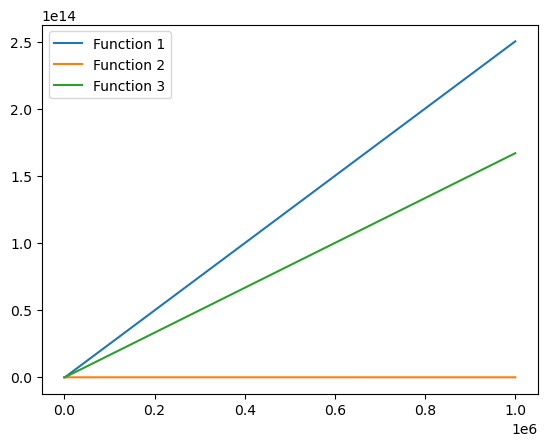

In [11]:
import matplotlib.pyplot as plt
print(f1,f2,f3,s)
plt.plot(s, f1, label="Function 1") # x^2
plt.plot(s, f2, label="Function 2") # n log n
plt.plot(s, f3, label="Function 3")
plt.legend()
plt.margins(0.05)
plt.show()